# EL2805 - Reinforcement Learning - Lab 1
Valeria Grotto & Dalim Wahby

In [1]:
import numpy as np
import maze as mz 

In [2]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 0],
    [0, 0, 1, 0, 1, 1, 1],
    [0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 1, 2, 0, 0]

])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze

In [3]:
env = mz.Maze(maze,key=False)

States  {0: ((0, 0), (0, 1)), 1: ((0, 0), (0, 2)), 2: ((0, 0), (0, 3)), 3: ((0, 0), (0, 4)), 4: ((0, 0), (0, 5)), 5: ((0, 0), (0, 6)), 6: ((0, 0), (1, 0)), 7: ((0, 0), (1, 1)), 8: ((0, 0), (1, 2)), 9: ((0, 0), (1, 3)), 10: ((0, 0), (1, 4)), 11: ((0, 0), (1, 5)), 12: ((0, 0), (1, 6)), 13: ((0, 0), (2, 0)), 14: ((0, 0), (2, 1)), 15: ((0, 0), (2, 2)), 16: ((0, 0), (2, 3)), 17: ((0, 0), (2, 4)), 18: ((0, 0), (2, 5)), 19: ((0, 0), (2, 6)), 20: ((0, 0), (3, 0)), 21: ((0, 0), (3, 1)), 22: ((0, 0), (3, 2)), 23: ((0, 0), (3, 3)), 24: ((0, 0), (3, 4)), 25: ((0, 0), (3, 5)), 26: ((0, 0), (3, 6)), 27: ((0, 0), (4, 0)), 28: ((0, 0), (4, 1)), 29: ((0, 0), (4, 2)), 30: ((0, 0), (4, 3)), 31: ((0, 0), (4, 4)), 32: ((0, 0), (4, 5)), 33: ((0, 0), (4, 6)), 34: ((0, 0), (5, 0)), 35: ((0, 0), (5, 1)), 36: ((0, 0), (5, 2)), 37: ((0, 0), (5, 3)), 38: ((0, 0), (5, 4)), 39: ((0, 0), (5, 5)), 40: ((0, 0), (5, 6)), 41: ((0, 0), (6, 0)), 42: ((0, 0), (6, 1)), 43: ((0, 0), (6, 2)), 44: ((0, 0), (6, 3)), 45: ((0, 0)

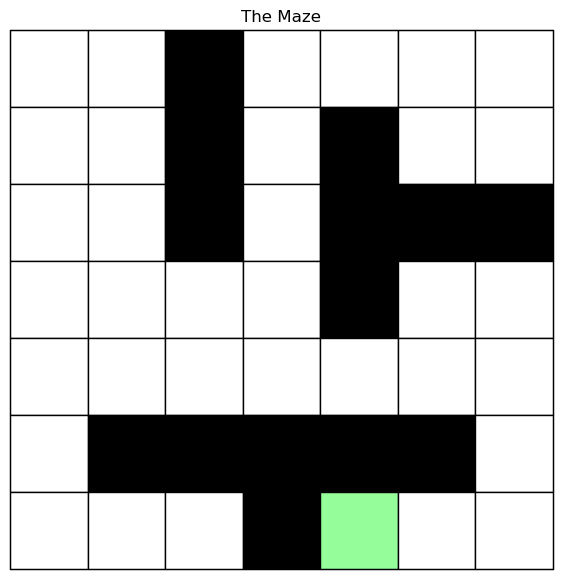

In [4]:
mz.draw_maze(maze)

In [5]:
# Finite horizon
horizon = 15
# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming_minotaur(env,horizon);

KeyboardInterrupt: 

In [ ]:
policy[34,horizon]

0.0

0

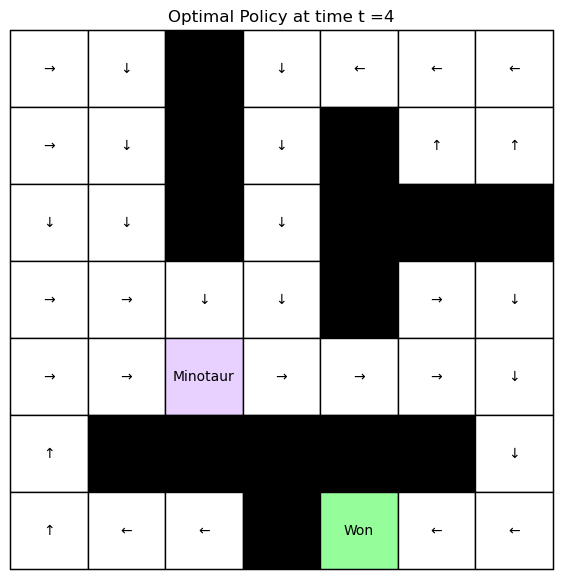

In [ ]:
minotaur = (4,2)
time = 4
mz.draw_policy(env, minotaur, policy, time)

In [ ]:
print(policy[:, horizon])

[0. 0. 0. ... 1. 0. 0.]


## Dynamic Programming

In [ ]:

# Simulate the shortest path starting from position (0,0) and using Dynamic Programming
method = 'DynProg';
start  = (0,0);
minotaur_start= (6,4);
path, minotaur_path, lost, won = env.simulate_minotaur(start, minotaur_start, policy, method);

if(lost):
  print('lost');
else:
  print('won')

won


In [ ]:
print(path)

[(0, 0), (1, 0), (1, 1), (2, 1), (3, 1), (3, 2), (3, 3), (4, 3), (4, 4), (4, 5), (4, 6), (5, 6), (6, 6), (6, 5), (6, 4)]


In [ ]:
print(minotaur_path)

[(6, 4), (6, 3), (6, 4), (6, 5), (6, 4), (6, 5), (6, 4), (6, 5), (6, 6), (6, 5), (6, 4), (5, 4), (5, 5), (4, 5), (4, 6)]


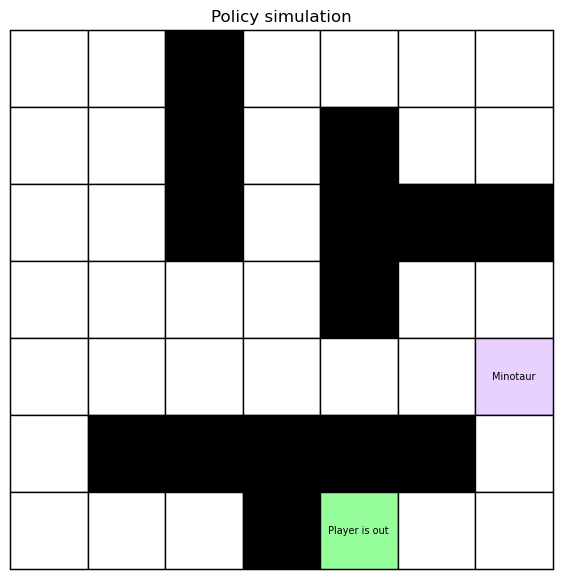

In [ ]:
# Show the shortest path 
mz.animate_solution(maze, path, minotaur_path)

In [ ]:
def get_probability(start,minotaur_start, policy,method, epochs):
  tot_count = 0
  win_count= 0

  for i in range(epochs):
    _, _, lost, won = env.simulate_minotaur(start, minotaur_start, policy, method);
  
    tot_count+=1;
    if(won):
      win_count +=1;
    
  return win_count/tot_count

In [ ]:
get_probability(start,minotaur_start, policy,method, 10000)

0.3395

In [ ]:
probabilities = []
horizon_list = []
for i in range(30):
  time = i+1
  horizon_list.append(time)
  # Solve the MDP problem with dynamic programming 
  V, policy= mz.dynamic_programming_minotaur(env,time);

  probabilities.append(get_probability(start,minotaur_start, policy,method, 10000))

print(probabilities)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0832, 0.3434, 0.4861, 0.5096, 0.5183, 0.5147, 0.5829, 0.5817, 0.6098, 0.6117, 0.6108, 0.62, 0.6282, 0.6437, 0.6542, 0.6365, 0.6458]


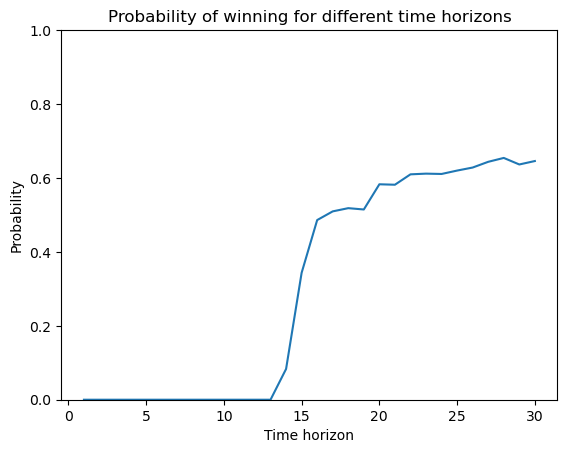

In [ ]:
# importing the required module 
import matplotlib.pyplot as plt 
  
# x axis values 
x = horizon_list
# corresponding y axis values 
y = probabilities
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('Time horizon') 
# naming the y axis 
plt.ylabel('Probability')
  
# giving a title to my graph 
plt.title('Probability of winning for different time horizons')

# Set the range of x-axis
plt.ylim(0, 1)
  
# function to show the plot 
plt.show() 

## Value Iteration

Life geometrically distributed with mean 30. 1/t = 30 => 

In [ ]:
# Discount Factor 
gamma   = 29/30; 
# Accuracy treshold 
epsilon = 0.0001;
V, policy = mz.value_iteration_minotaur(env, gamma, epsilon)

In [ ]:
# Simulate the shortest path starting from position A
method = 'ValIter';
start  = (0,0);
minotaur_start= (6,4);
path, minotaur_path,lost, won = env.simulate_minotaur(start, minotaur_start, policy, method);
if(lost):
  print('lost');
else:
  print('won')

won


In [ ]:
print(path)
print(minotaur_path)

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 6), (6, 6), (6, 5), (6, 4)]
[(6, 4), (6, 5), (6, 6), (5, 6), (4, 6), (5, 6), (4, 6), (5, 6), (4, 6), (3, 6), (2, 6), (1, 6), (1, 5), (1, 4), (0, 4)]


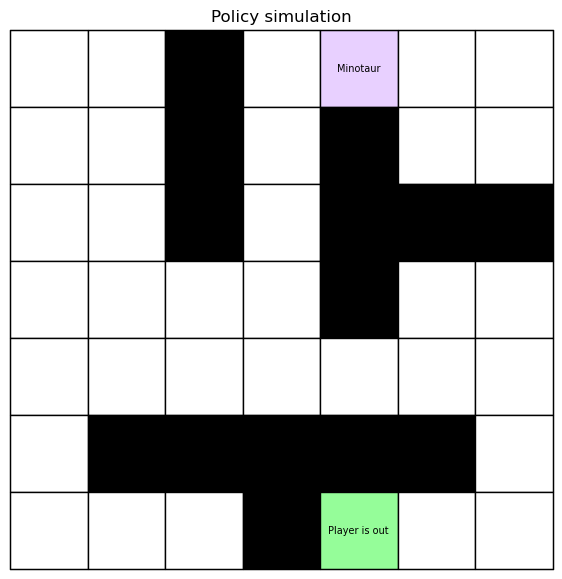

In [ ]:
mz.animate_solution(maze, path, minotaur_path)

### f) Probability of Winning by simulating 10000 games

In [ ]:
get_probability(start,minotaur_start, policy,method, 10000)

0.6528

### h) Value iteration with key

In [ ]:
# New maze
maze = np.array([
    [0, 0, 1, 0, 0, 0, 3],
    [0, 0, 1, 0, 1, 0, 0],
    [0, 0, 1, 0, 1, 1, 1],
    [0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 1, 2, 0, 0]

])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze
# 3 = key

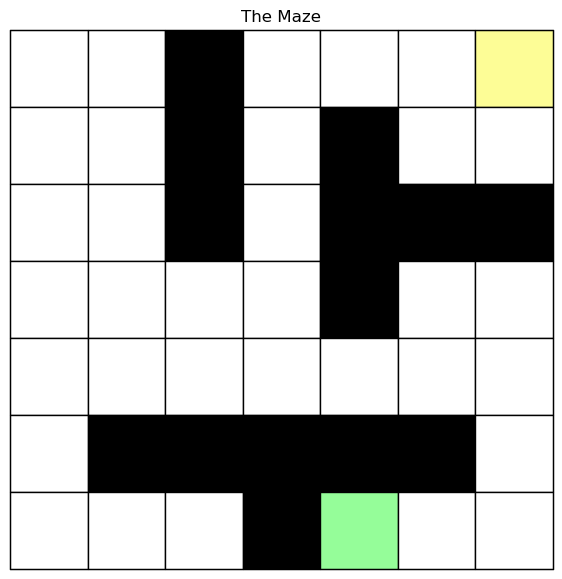

In [ ]:
mz.draw_maze(maze)

In [ ]:
env = mz.Maze(maze, key = True)

States  {0: ((0, 0), (0, 1), 0), 1: ((0, 0), (0, 1), 1), 2: ((0, 0), (0, 2), 0), 3: ((0, 0), (0, 2), 1), 4: ((0, 0), (0, 3), 0), 5: ((0, 0), (0, 3), 1), 6: ((0, 0), (0, 4), 0), 7: ((0, 0), (0, 4), 1), 8: ((0, 0), (0, 5), 0), 9: ((0, 0), (0, 5), 1), 10: ((0, 0), (0, 6), 0), 11: ((0, 0), (0, 6), 1), 12: ((0, 0), (1, 0), 0), 13: ((0, 0), (1, 0), 1), 14: ((0, 0), (1, 1), 0), 15: ((0, 0), (1, 1), 1), 16: ((0, 0), (1, 2), 0), 17: ((0, 0), (1, 2), 1), 18: ((0, 0), (1, 3), 0), 19: ((0, 0), (1, 3), 1), 20: ((0, 0), (1, 4), 0), 21: ((0, 0), (1, 4), 1), 22: ((0, 0), (1, 5), 0), 23: ((0, 0), (1, 5), 1), 24: ((0, 0), (1, 6), 0), 25: ((0, 0), (1, 6), 1), 26: ((0, 0), (2, 0), 0), 27: ((0, 0), (2, 0), 1), 28: ((0, 0), (2, 1), 0), 29: ((0, 0), (2, 1), 1), 30: ((0, 0), (2, 2), 0), 31: ((0, 0), (2, 2), 1), 32: ((0, 0), (2, 3), 0), 33: ((0, 0), (2, 3), 1), 34: ((0, 0), (2, 4), 0), 35: ((0, 0), (2, 4), 1), 36: ((0, 0), (2, 5), 0), 37: ((0, 0), (2, 5), 1), 38: ((0, 0), (2, 6), 0), 39: ((0, 0), (2, 6), 1), 4

In [ ]:
# Discount Factor 
gamma   = 49/50; 
# Accuracy treshold 
epsilon = 0.0001;
V, policy = mz.value_iteration_minotaur(env, gamma, epsilon)

In [ ]:
# Simulate the shortest path starting from position A
method = 'ValIter';
start = (0,0);
minotaur_start = (6,4)
path, minotaur_path,lost, won = env.simulate_minotaur(start, minotaur_start, policy, method, key = True);
if(lost):
  print('lost');
else:
  print('won')

key getted
lost


### Q learning epsilon-greedy

In [1]:
import numpy as np
import maze as mz 

In [2]:
# New maze
maze = np.array([
    [0, 0, 1, 0, 0, 0, 3],
    [0, 0, 1, 0, 1, 0, 0],
    [0, 0, 1, 0, 1, 1, 1],
    [0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 1, 2, 0, 0]

])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze
# 3 = key

In [3]:
env = mz.Maze(maze, key = True)

States  {0: ((0, 0), (0, 1), 0), 1: ((0, 0), (0, 1), 1), 2: ((0, 0), (0, 2), 0), 3: ((0, 0), (0, 2), 1), 4: ((0, 0), (0, 3), 0), 5: ((0, 0), (0, 3), 1), 6: ((0, 0), (0, 4), 0), 7: ((0, 0), (0, 4), 1), 8: ((0, 0), (0, 5), 0), 9: ((0, 0), (0, 5), 1), 10: ((0, 0), (0, 6), 0), 11: ((0, 0), (0, 6), 1), 12: ((0, 0), (1, 0), 0), 13: ((0, 0), (1, 0), 1), 14: ((0, 0), (1, 1), 0), 15: ((0, 0), (1, 1), 1), 16: ((0, 0), (1, 2), 0), 17: ((0, 0), (1, 2), 1), 18: ((0, 0), (1, 3), 0), 19: ((0, 0), (1, 3), 1), 20: ((0, 0), (1, 4), 0), 21: ((0, 0), (1, 4), 1), 22: ((0, 0), (1, 5), 0), 23: ((0, 0), (1, 5), 1), 24: ((0, 0), (1, 6), 0), 25: ((0, 0), (1, 6), 1), 26: ((0, 0), (2, 0), 0), 27: ((0, 0), (2, 0), 1), 28: ((0, 0), (2, 1), 0), 29: ((0, 0), (2, 1), 1), 30: ((0, 0), (2, 2), 0), 31: ((0, 0), (2, 2), 1), 32: ((0, 0), (2, 3), 0), 33: ((0, 0), (2, 3), 1), 34: ((0, 0), (2, 4), 0), 35: ((0, 0), (2, 4), 1), 36: ((0, 0), (2, 5), 0), 37: ((0, 0), (2, 5), 1), 38: ((0, 0), (2, 6), 0), 39: ((0, 0), (2, 6), 1), 4

In [4]:
start = (0,0)
minotaur_start = (6,4)
episodes = 50000
alpha = 0.6
# Discount Factor (life geometrically distributed with mean 50)
gamma   = 49/50; 
epsilon = 0.5
key_cell = (0,6)
Q, estimated_policy, vf_initial = env.Q_learning_greedy(start, minotaur_start, key_cell, alpha, gamma, epsilon, episodes, key = True)

0

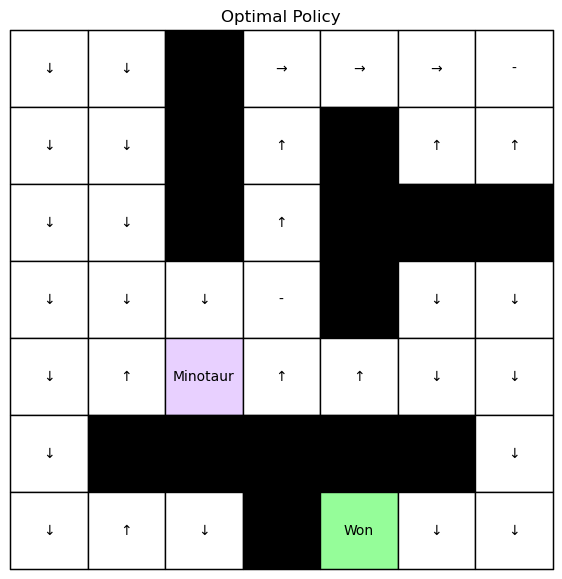

In [5]:
minotaur = (4,2)
time = 4
mz.draw_policy(env, minotaur, estimated_policy, time = -1, key =True, key_val = 1)

In [9]:
epsilon = 0.2
Q, estimated_policy, vf_initial_2 = env.Q_learning_greedy(start, minotaur_start, key_cell, alpha, gamma, epsilon, episodes, key = True)

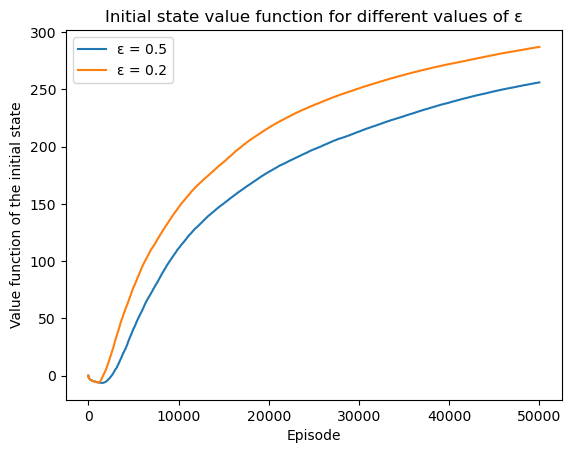

In [15]:
# importing the required module 
import matplotlib.pyplot as plt 
  
# x axis values 
x = np.arange(1, episodes+1)
  
# plotting the points  
plt.plot(x, vf_initial, label = "\u03B5 = 0.5") 

plt.plot(x, vf_initial_2, label = "\u03B5 = 0.2") 
  
# naming the x axis 
plt.xlabel('Episode') 
# naming the y axis 
plt.ylabel('Value function of the initial state')
  
# giving a title to my graph 
plt.title('Initial state value function for different values of \u03B5')
plt.legend()   
# function to show the plot 
plt.show() 

### Fix epsilon, show the convergence for 2 different step sizes

In [4]:
start = (0,0)
minotaur_start = (6,4)
episodes = 50000
alpha = 0.6
# Discount Factor (life geometrically distributed with mean 50)
gamma   = 49/50; 
epsilon = 0.5
key_cell = (0,6)
Q, estimated_policy, vf_initial = env.Q_learning_greedy(start, minotaur_start, key_cell, alpha, gamma, epsilon, episodes, key = True)

In [5]:
alpha = 0.8
Q, estimated_policy, vf_initial_2 = env.Q_learning_greedy(start, minotaur_start, key_cell, alpha, gamma, epsilon, episodes, key = True)

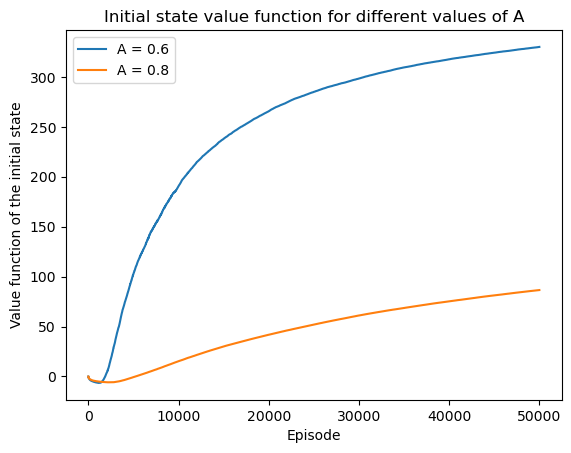

In [6]:
# importing the required module 
import matplotlib.pyplot as plt 
  
# x axis values 
x = np.arange(1, episodes+1)
  
# plotting the points  
plt.plot(x, vf_initial, label = "\u0391 = 0.6") 

plt.plot(x, vf_initial_2, label = "\u0391 = 0.8") 
  
# naming the x axis 
plt.xlabel('Episode') 
# naming the y axis 
plt.ylabel('Value function of the initial state')
  
# giving a title to my graph 
plt.title('Initial state value function for different values of \u0391')
plt.legend()   
# function to show the plot 
plt.show() 